<a href="https://colab.research.google.com/github/Ujwal-0/Computational-Data-Science-Physics-I/blob/main/Gravitational_Waves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link to original notebook
https://colab.research.google.com/github/mitx-8s50/nb_LEARNER/blob/main/8S50x_L03.ipynb

## Importing Data (Colab Only)
If you are in a Google Colab environment, run the cell below to import the data for this notebook.

In [ ]:
#>>>RUN L3.0-runcell00

#Importing data:

!git init
!git remote add -f origin https://github.com/mitx-8s50/nb_LEARNER/
!git config core.sparseCheckout true
!echo 'data/L03' >> .git/info/sparse-checkout
!git pull origin main

In [ ]:
!pip install soundfile

In [ ]:


import numpy as np                    #https://numpy.org/doc/stable/
from matplotlib import pyplot as plt  #https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html
from scipy.fft import fft, fftfreq    #https://docs.scipy.org/doc/scipy/reference/fft.html
                                      #https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fftfreq.html
from scipy.io.wavfile import write    #https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.write.html

## Setting Default Figure Parameters
The following code cell sets default values for figure parameters.

In [ ]:
#set plot resolution
%config InlineBackend.figure_format = 'retina'

#set default figure parameters
plt.rcParams['figure.figsize'] = (9,6)

medium_size = 12
large_size = 15

plt.rc('font', size=medium_size)          # default text sizes
plt.rc('xtick', labelsize=medium_size)    # xtick labels
plt.rc('ytick', labelsize=medium_size)    # ytick labels
plt.rc('legend', fontsize=medium_size)    # legend
plt.rc('axes', titlesize=large_size)      # axes title
plt.rc('axes', labelsize=large_size)      # x and y labels
plt.rc('figure', titlesize=large_size)    # figure title

## Noise audio

In [ ]:
import time
import soundfile as sf
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import Audio, display

data1, samplerate1 = sf.read('data/L03/Athens_01.wav')

def play(iArray,iFS,title):
    sf.write('data/L03/tmp.wav', iArray, iFS)
    print(title)
    display(Audio('data/L03/tmp.wav',autoplay=False))

play(data1,samplerate1,'Athens_01')

Athens_01


# Fourier Transform
Let's practice using Fourier transforms on some data! First, let's just generate a dataset with two frequencies, say 400 Hertz and 4000 Hertz, then add them together and plot the sum. What does the combination of the two waves look like?

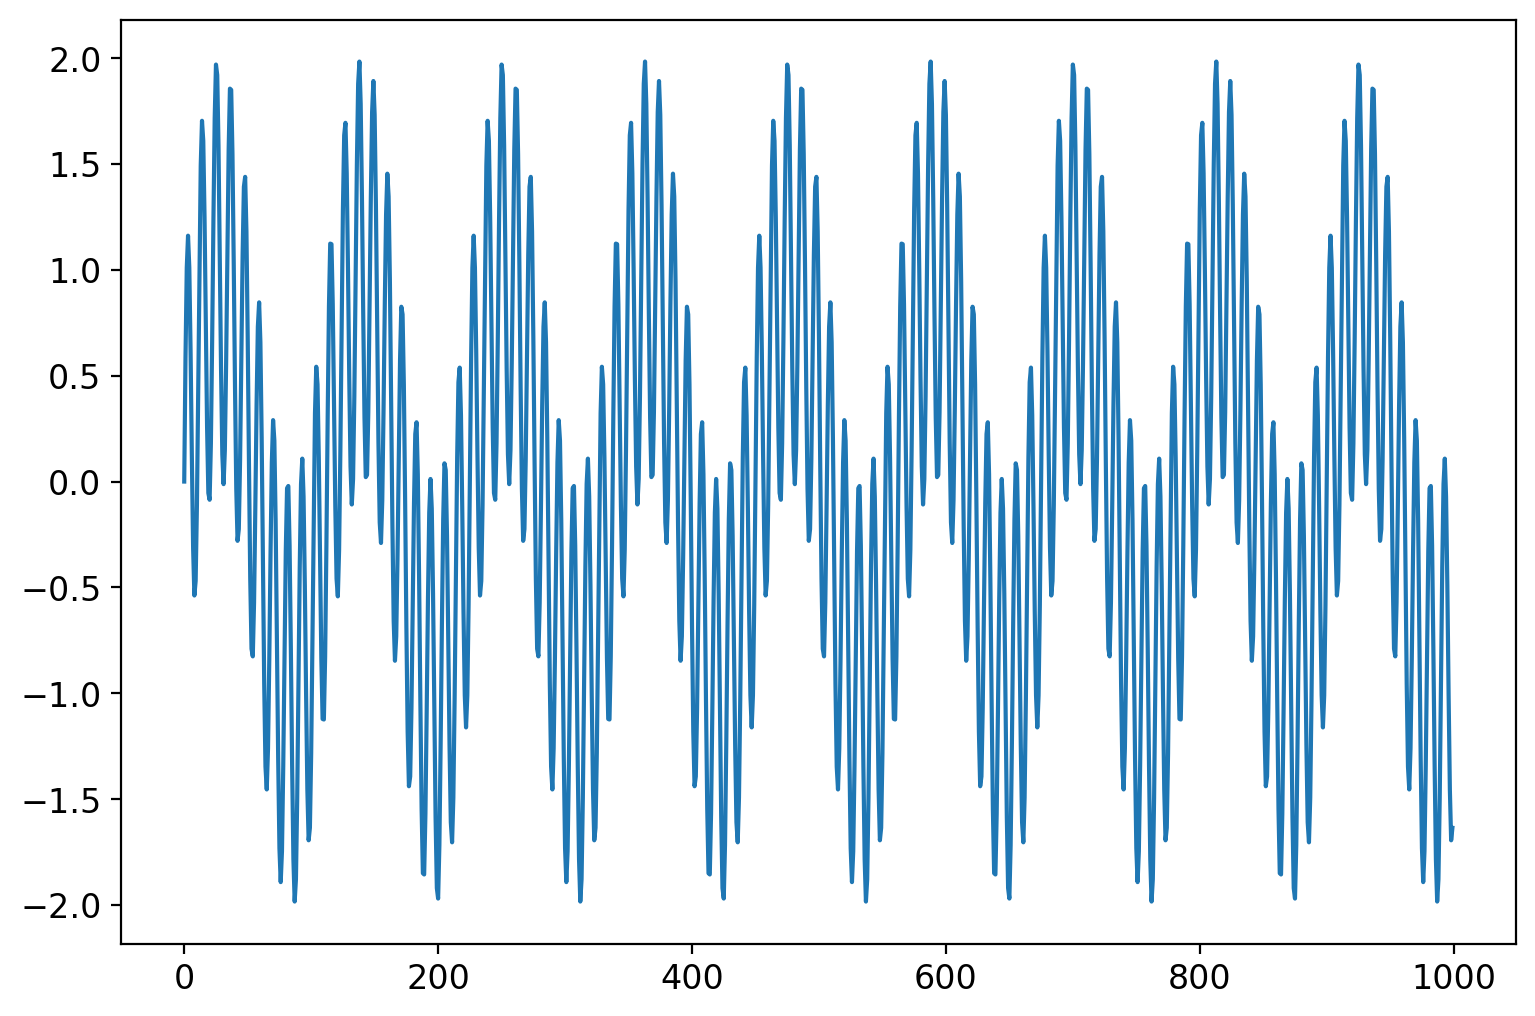

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

#Generate some sample
def generate_sine_wave(freq, sample_rate, duration):
  x = np.linspace(0,duration,sample_rate*duration, endpoint=False)
  #creates an array x with range 0 to duration, with evenly spaced 'sample_Rate*duration' no. of values, with endpoint of the duration not included
  frequencies = x*freq
  #creates an array frequencies which maps each value in x(time) to a frequency value, so it contains freq values corresponding to different time
  #x contains data of time and frequencies contain their corresponding freq values: mapping of time with frequency
  y = np.sin((2*np.pi)*frequencies)
  #takes in freq values(Hz) converts them into radians(*2pi) and generate a sine curve. np.sin function expects its input in radians
  return x, y

#Mix two different sine waves
SAMPLE_RATE = 45000 #Hertz
DURATION = 5 #sec
_,tone1 = generate_sine_wave(400, SAMPLE_RATE, DURATION)
_,tone2 = generate_sine_wave(4000, SAMPLE_RATE, DURATION)
mixed_tone = tone1+tone2

plt.plot(mixed_tone[:1000])
#[:1000] slicing notation which considers datapoints from first index(0) till but not including 1000th index. So it contains 1000 datapoints
plt.show()


You see a big sine wave corresponding to the lower frequency, with higher frequency sine waves oscillations superimposed along it

---



---


Now, run a Fourier transform on the mixed wave consisting of a 400 Hertz wave and a 4000 Hertz wave. Note the peaks in the Fourier spectrum. How does the transform change if you use two frequencies that are closer to each other?

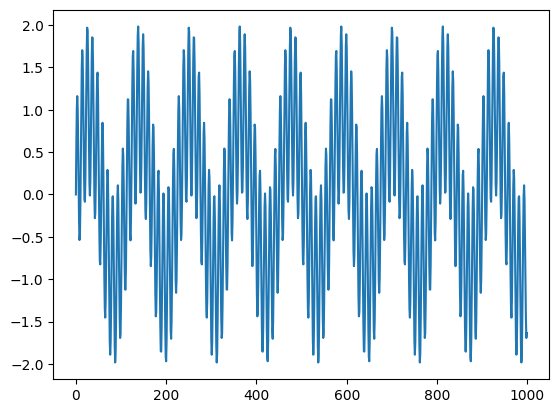

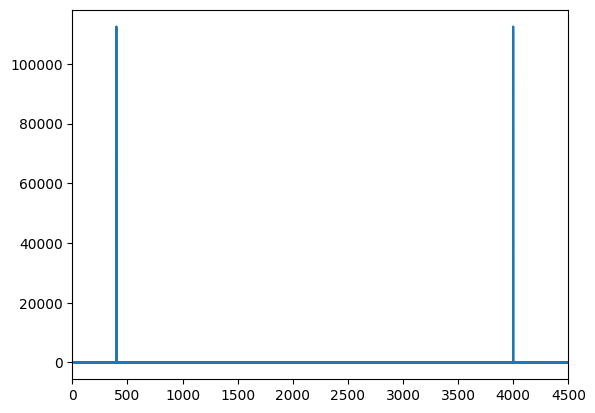

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.fft import fft, fftfreq

#Create some data
def generate_sine_wave(freq, sample_rate, duration):
  x = np.linspace(0,duration,sample_rate*duration, endpoint=False)
  frequencies = x*freq
  y = np.sin((2*np.pi)*frequencies)
  return x, y

#mix 2 different sine waves
SAMPLE_RATE = 45000 #Hertz
DURATION = 5 #second
_,tone1 = generate_sine_wave(400, SAMPLE_RATE, DURATION)
_,tone2 = generate_sine_wave(4000, SAMPLE_RATE, DURATION)
mixed_tone = tone1+tone2

plt.plot(mixed_tone[:1000])
plt.show()

#Number of samples
N = SAMPLE_RATE * DURATION

#perform the Fourier transform
yf = fft(mixed_tone)
#Fast fourier transform(fft) operation converts mixed_tone(time domain: x axis is time) into frequency domain(x-axis is frequency) and store it in array yf
#it helps to analyse the frequency components of the signal and understand different frequencies present in the signal
xf = fftfreq(N, 1/SAMPLE_RATE)
#calculates freq values for fft results and store it in the array xf.
#fftfreq generates N equally spaced frequencies btw 0 and Nyquist frequencies(half of the sample rate)
plt.plot(xf, np.abs(yf))
#xf is an array of frequency values generated using 'fftfreq'
#yf is an array of result of fft and its absolute value is taken to get the magnitude spectrum
plt.xlim(0,4500)
#creates a limit of x axis
plt.show()


In Fourier space, the sum of two sine waves corresponds to delta functions at their frequency of generation, so the Fourier transform just gives us a peak at the frequency of each sine wave. By construction, the Fourier transform also gives a peak at the negative values of the same frequencies.


---
The two peaks you see are corresponding to 400 and 4000 Hz signal that are present in our mix. So, using Fourier transform we found out the frequencies of the signal we have.
By performing the FFT, you can analyze the frequency content of the mixed signal, which helps in identifying and understanding the different frequency components present in the signal. The peaks in the spectrum align with the frequencies of the original sine waves you generated.

